In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv(r'D:\Đồ án TN\raw_data\cafef_news_test1.csv')
petro_data = pd.read_csv(r'D:\Đồ án TN\raw_data\data.csv')

In [3]:
petro_data.head()

,Title,Link,Description,Time,Category,Detail Content
0,"Petrolimex(PLX) báo lãi sụt giảm 81%, đang có ...",https://cafef.vn/petrolimex-plx-bao-lai-sut-gi...,"Quý 1/2025, Petrolimex (PLX) báo lãi sau thuế ...",03-05-2025 - 13:35 PM,Thị trường chứng khoán,TIN MỚITập đoàn Xăng dầu Việt Nam - Petrolimex...
1,ĐHCĐPetrolimex: Doanh thu mất 1.000 tỷ đồng sa...,https://cafef.vn/dhcd-petrolimex-doanh-thu-mat...,Petrolimex và nhiều thương nhân xăng dầu khác ...,26-04-2025 - 09:37 AM,Doanh nghiệp,"TIN MỚISáng ngày 25/4/2025, Tập đoàn Xăng dầu ..."
2,Tổng công ty Hóa dầuPetrolimexđặt kế hoạch lợi...,https://cafef.vn/tong-cong-ty-hoa-dau-petrolim...,"Trong năm qua, Tổng công ty đã ban hành quyết ...",19-04-2025 - 07:17 AM,Doanh nghiệp,PLC:Giá hiện tạiThay đổiXem hồ sơ doanh nghiệp...
3,PetrolimexAviation: 17 năm đồng hành phát triể...,https://cafef.vn/petrolimex-aviation-17-nam-do...,"Ngày 28/4/2025, Công ty Cổ phần Nhiên liệu bay...",15-04-2025 - 14:30 PM,Doanh nghiệp giới thiệu,TIN MỚIDù tuổi đời còn trẻ so với lịch sử gần ...
4,"Hết năm 2024, quỹ bình ổn xăng dầu còn hơn 6.0...",https://cafef.vn/het-nam-2024-quy-binh-on-xang...,Số lãi phát sinh trên số dư Quỹ bình ổn xăng d...,02-04-2025 - 16:26 PM,Doanh nghiệp,"TIN MỚITừ cuối năm 2023 đến nay, cơ quan điều ..."


In [4]:
df.head()


,Time,Headline,Link,content,subtitle,Keyword
0,2025-04-14T11:15:00,"Chứng khoán ""đi tàu lượn"", PNJ lập tức bổ sung...",https://cafef.vn/chung-khoan-di-tau-luon-pnj-l...,PNJ:Giá hiện tạiThay đổiXem hồ sơ doanh nghiệp...,"Tạm tính theo thị giá trên sàn, PNJ có thể cần...","PNJ,, cổ phiếu,, cổ phiếu quỹ,, chứng khoán,, ..."
1,2025-04-14T10:34:00,Nhiều doanh nghiệp lớn sẵn sàng làm đường sắt,https://cafef.vn/nhieu-doanh-nghiep-lon-san-sa...,"TIN MỚIThời gian qua, Bộ Xây dựng đã báo cáo B...",Nhu cầu đầu tư đường sắt mở ra cơ hội lớn cho ...,"đường sắt,, doanh nghiệp,, chứng khoán"
2,2025-04-14T09:44:00,Hãng taxi của ông Phạm Nhật Vượng tung giải ph...,https://cafef.vn/hang-taxi-cua-ong-pham-nhat-v...,"TIN MỚITheo thông báo mới nhất, từ ngày 13/4/2...","Hành khách đặc biệt là phụ nữ, trẻ em, người c...","Xanh SM,, taxi điện,, Phạm Nhật Vượng,, vinfast"
3,2025-04-14T08:00:00,KIS Research: Thị trường đang bị định giá thấp,https://cafef.vn/kis-research-thi-truong-dang-...,TIN MỚIThị trường giảm mạnh trước chính sách t...,Thị trường chứng khoán Việt Nam giảm mạnh sau ...,chứng khoán
4,2025-04-14T07:33:00,Lý do hủy đấu giá cổ phần lớn nhất lịch sử chứ...,https://cafef.vn/ly-do-huy-dau-gia-co-phan-lon...,"TIN MỚITuần này, có 5 doanh nghiệp thông báo c...","Do cổ phiếu giảm sàn 4 phiên liên tiếp, Became...","chứng khoán,, đấu giá,, cổ phiếu"


## Tiền xử lý dữ liệu 
- Đưa dữ liệu về chữ thường
- Loại bỏ các chữ số
- Kí tự đặc biệt
- Loại bỏ khoảng trắng thừa
....

In [5]:
#Đưa về kiểu chữ thường
def text_lowercase(text):
    return text.lower()
#Loại bỏ khoảng trắng thừa
def remove_whitespace(text):
    return  " ".join(text.split())
def remove_stopwords(text, stop_words):
    words = text.split()
    return " ".join(word for word in words if word.lower() not in stop_words)

def text_preprocessing(text, stop_words):
    if not isinstance(text, str):
        return text
    text = text_lowercase(text)
    # text = remove_special_characters(text)
    # text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = remove_stopwords(text, stop_words)
    return text


In [6]:

# Load stopwords
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
    stop_words = set(f.read().splitlines())

In [7]:
df['content'] = df['content'].str.replace('TIN MỚI', '')  
petro_data['Detail Content'] = petro_data['Detail Content'].str.replace('TIN MỚI', '')  
# Tách cột 'Time' thành hai cột 'Date' và 'Hour' bằng cách tách chuỗi tại ký tự 'T'
df[['Date', 'Hour']] = df['Time'].str.split('T', expand=True)
petro_data[['Date','Hour']] = petro_data['Time'].str.split(' - ', expand=True)

df['Date'] = pd.to_datetime(df['Date'])  
# petro_data['Date'] = pd.to_datetime(petro_data['Date'])  



In [8]:
petro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           815 non-null    object
 1   Link            815 non-null    object
 2   Description     807 non-null    object
 3   Time            813 non-null    object
 4   Category        751 non-null    object
 5   Detail Content  813 non-null    object
 6   Date            813 non-null    object
 7   Hour            813 non-null    object
dtypes: object(8)
memory usage: 51.1+ KB


## Lọc dữ liệu liên quan đến dầu khí và PLX

In [11]:
#Danh sách từ khóa cần tìm
key_word = ['dầu khí','giá dầu', 'dầu thô', 'opec','lô B','Lọc hóa dầu','brent','wti','nga-ukraina',
            'opec','xăng dầu thế giới','khai thác dầu','xuất dầu','nhập dầu','dầu mỏ','dự trữ dầu',
            'thuê giàn khoan','lọc dầu','vn-index']
# key_word2 = ['plx','petro','petrolimex']
# Hàm xử lý lọc câu chứa từ khóa
def filter_sentences(text, keywords):
    if pd.isna(text):  # Kiểm tra nếu giá trị NaN
        return ""
    
    # Tách câu theo dấu chấm, giữ nguyên số thập phân
    sentences = re.split(r'(?<!\d)(?<!\.)\.(?!\d|\.)', text)
    
    # Loại bỏ khoảng trắng và câu rỗng
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lọc các câu chứa từ khóa
    filtered_sentences = [
    sentence for sentence in sentences
    if any(re.search(rf'\b{re.escape(keyword)}\b', sentence, re.IGNORECASE) for keyword in keywords)
    ]

    # Nối lại thành đoạn văn bản
    return ". ".join(filtered_sentences) + ("." if filtered_sentences else "")

# Áp dụng hàm vào cột mới
df["filtered_content"] = df["content"].apply(lambda x: filter_sentences(x, keywords=key_word))
petro_data['filtered_content'] = petro_data['Detail Content'].apply(lambda x: filter_sentences(x, keywords=key_word))

In [12]:
#Áp dụng tiền xử lý cho cột 'content'
df['content'] = df['content'].map(lambda x: text_preprocessing(x, stop_words))
petro_data['Detail Content'] = petro_data['Detail Content'].map(lambda x: text_preprocessing(x, stop_words))

In [13]:
# Thay thế giá trị trống, khoảng trắng thành NaN
df.replace(r'^\s*$', None, regex=True, inplace=True)
petro_data.replace(r'^\s*$', None, regex=True, inplace=True)
# Xóa hàng có cột 'content' hoặc 'filtered_content' bị thiếu
df.dropna(subset=['content'], inplace=True)
petro_data.dropna(subset=['Detail Content'], inplace=True)

In [14]:

df.dropna(subset=["filtered_content"],inplace = True)
petro_data.dropna(subset=["filtered_content"],inplace = True)
df.to_csv('filtered_cafef_news_details_test.csv', index=False)
petro_data.to_csv('filtered_petro_news_details_test.csv', index=False)
df.head()  # Hiển thị 5 dòng đầu của dữ liệu đã lọc

,Time,Headline,Link,content,subtitle,Keyword,Date,Hour,filtered_content
3,2025-04-14T08:00:00,KIS Research: Thị trường đang bị định giá thấp,https://cafef.vn/kis-research-thi-truong-dang-...,"thị trường sách thuế mỹđầu 04/2025, thị trường...",Thị trường chứng khoán Việt Nam giảm mạnh sau ...,chứng khoán,2025-04-14,08:00:00,"Hệ số PE forward của chỉ số VN-Index. Cụ thể, ..."
5,2025-04-14T00:11:00,Hai quỹ thành viên của VinaCapital đăng ký mua...,https://cafef.vn/hai-quy-thanh-vien-cua-vinaca...,"thông sở giao dịch chứng khoán hà nội (hnx), h...",Quỹ đầu tư Cổ phiếu Tiếp cận Thị trường VinaCa...,"vinacapital,, cổ phiếu",2025-04-14,00:11:00,Thông tin từ Sở Giao dịch Chứng khoán Hà Nội (...
6,2025-04-14T00:02:00,MBS: Đây là thời điểm tái cơ cấu danh mục sang...,https://cafef.vn/mbs-day-la-thoi-diem-tai-co-c...,tổng thống mỹ donald trump thông báo tạm hoãn ...,"Nhiều nhóm ngành là ""nơi trú ẩn"" an toàn cho d...","chứng khoán,, Nhóm ngành",2025-04-14,00:02:00,Một nhóm ngành khác được đánh giá cao làDầu kh...
7,2025-04-13T21:32:00,Thị trường chứng khoán sẽ hồi phục trong tuần ...,https://cafef.vn/thi-truong-chung-khoan-se-hoi...,thị trường chứng khoán dự báo hồi phục tích cự...,Thị trường chứng khoán đang có dấu hiệu tích c...,"chứng khoán,, cổ phiếu,, vn-index",2025-04-13,21:32:00,Các yếu tố hỗ trợ cho thị trường bao gồm: Định...
10,2025-04-13T15:14:00,Góc nhìn chuyên gia: Thị trường chứng khoán đã...,https://cafef.vn/goc-nhin-chuyen-gia-thi-truon...,liên tiếp biến động bất ngờ xuất hiện thị trườ...,"""Với xu hướng tích cực đang dần trở lại, tâm l...","Vn Index,, chứng khoán",2025-04-13,15:14:00,"Sau 2 phiên giảm mạnh thứ Ba và thứ Tư, có thờ..."


SENTIMENT ANALYST



In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from underthesea import word_tokenize
# Load model và tokenizer
checkpoint = "mr4/phobert-base-vi-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

def predict_sentiment_score(text, max_length=256, stride=50):
    """
    Dự đoán điểm cảm xúc của văn bản dài bằng PhoBERT.

    Args:
        text (str): Văn bản cần phân tích.
        max_length (int): Số token tối đa của mô hình.
        stride (int): Mức độ chồng lấn giữa các đoạn.

    Returns:
        dict: Xác suất của các nhãn cảm xúc {label: probability}
    """
    # Bước 1: Tách từ bằng Underthesea để phù hợp với PhoBERT
    word_segmented_text = word_tokenize(text, format="text")
    # Tokenize văn bản dài, cắt thành từng đoạn
    inputs = tokenizer(
        word_segmented_text,
        padding=True,
        truncation=True,
        return_tensors="pt",
        max_length=max_length,
        stride=stride,
        return_overflowing_tokens=True
    )

    input_keys = ["input_ids", "attention_mask"]
    all_predictions = []

    with torch.no_grad():  # Không tính gradient để tăng tốc
        for i in range(len(inputs["input_ids"])):  # Duyệt qua từng đoạn đã cắt
            segment = {k: inputs[k][i].unsqueeze(0) for k in input_keys}
            outputs = model(**segment)
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            all_predictions.append(predictions[0].tolist())

    # Tính trung bình dự đoán từ tất cả các đoạn
    avg_predictions = torch.tensor(all_predictions).mean(dim=0)

    # Chuyển kết quả thành dict với nhãn và xác suất tương ứng
    sentiment_scores = {
        model.config.id2label[j]: avg_predictions[j].item()
        for j in range(len(avg_predictions))
    }

    return sentiment_scores


c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [16]:
# Áp dụng hàm sentiment prediction vào cột 'content'
df["sentiment"] = df["filtered_content"].apply(predict_sentiment_score)
petro_data["sentiment"] = petro_data["filtered_content"].apply(predict_sentiment_score)

In [17]:
petro_data.head()

,Title,Link,Description,Time,Category,Detail Content,Date,Hour,filtered_content,sentiment
1,ĐHCĐPetrolimex: Doanh thu mất 1.000 tỷ đồng sa...,https://cafef.vn/dhcd-petrolimex-doanh-thu-mat...,Petrolimex và nhiều thương nhân xăng dầu khác ...,26-04-2025 - 09:37 AM,Doanh nghiệp,"25/4/2025, tập đoàn xăng dầu việt nam (petroli...",26-04-2025,09:37 AM,"Giá xăng dầu thế giới có biến động mạnh, bị ản...","{'Tiêu cực': 0.11678368598222733, 'Tích cực': ..."
2,Tổng công ty Hóa dầuPetrolimexđặt kế hoạch lợi...,https://cafef.vn/tong-cong-ty-hoa-dau-petrolim...,"Trong năm qua, Tổng công ty đã ban hành quyết ...",19-04-2025 - 07:17 AM,Doanh nghiệp,plc:giá hiện tạithay đổixem hồ sơ doanh nghiệp...,19-04-2025,07:17 AM,"Thông tin chia sẻ tại đại hội, từ năm 2024, th...","{'Tiêu cực': 0.8773283362388611, 'Tích cực': 0..."
4,"Hết năm 2024, quỹ bình ổn xăng dầu còn hơn 6.0...",https://cafef.vn/het-nam-2024-quy-binh-on-xang...,Số lãi phát sinh trên số dư Quỹ bình ổn xăng d...,02-04-2025 - 16:26 PM,Doanh nghiệp,"2023 nay, quan hành giá dừng trích lập, chi sử...",02-04-2025,16:26 PM,"Cụ thể, số dư tại Tập đoàn Xăng dầu Việt Nam (...","{'Tiêu cực': 0.028368322178721428, 'Tích cực':..."
12,"Gặp Thủ tướng, các ""cánh chim đầu đàn"" Viettel...",https://cafef.vn/gap-thu-tuong-cac-canh-chim-d...,Các Tập đoàn lớn đều cho rằng cần phát triển t...,28-02-2025 - 11:09 AM,Thị trường chứng khoán,27/2 diễn hội nghị trực phủ doanh nghiệp (dnnn...,28-02-2025,11:09 AM,"﻿Đồng thời,﻿ông Lê Ngọc Sơn, Tổng Giám đốc Tập...","{'Tiêu cực': 0.004154488909989595, 'Tích cực':..."
13,Petrolimexmuốn bán mảng kinh doanh tại Lào,https://cafef.vn/petrolimex-muon-ban-mang-kinh...,Mức giá khởi điểm từ 68 tỷ đồng.,18-02-2025 - 14:13 PM,Doanh nghiệp,plx:giá hiện tạithay đổixem hồ sơ doanh nghiệp...,18-02-2025,14:13 PM,Petrolimex báo lãi ròng quý III/2024 giảm sâu ...,"{'Tiêu cực': 0.26109689474105835, 'Tích cực': ..."


In [18]:
# Tách sentiment thành 3 cột riêng biệt
df_sentiment = df['sentiment'].apply(lambda x: eval(x) if isinstance(x, str) else x).apply(pd.Series)
petro_data_sentiment = petro_data['sentiment'].apply(lambda x: eval(x) if isinstance(x, str) else x).apply(pd.Series)
# Đổi tên cột nếu cần
df_sentiment.columns = ['Tiêu cực', 'Tích cực', 'Trung tính']
petro_data_sentiment.columns = ['Tiêu cực', 'Tích cực', 'Trung tính']
# Gộp vào DataFrame gốc và xóa cột sentiment cũ nếu cần
df = pd.concat([df.drop(columns=['sentiment']), df_sentiment], axis=1)
petro_data = pd.concat([petro_data.drop(columns=['sentiment']), petro_data_sentiment], axis=1)


In [19]:
df.head()

,Time,Headline,Link,content,subtitle,Keyword,Date,Hour,filtered_content,Tiêu cực,Tích cực,Trung tính
3,2025-04-14T08:00:00,KIS Research: Thị trường đang bị định giá thấp,https://cafef.vn/kis-research-thi-truong-dang-...,"thị trường sách thuế mỹđầu 04/2025, thị trường...",Thị trường chứng khoán Việt Nam giảm mạnh sau ...,chứng khoán,2025-04-14,08:00:00,"Hệ số PE forward của chỉ số VN-Index. Cụ thể, ...",0.032994,0.372333,0.594673
5,2025-04-14T00:11:00,Hai quỹ thành viên của VinaCapital đăng ký mua...,https://cafef.vn/hai-quy-thanh-vien-cua-vinaca...,"thông sở giao dịch chứng khoán hà nội (hnx), h...",Quỹ đầu tư Cổ phiếu Tiếp cận Thị trường VinaCa...,"vinacapital,, cổ phiếu",2025-04-14,00:11:00,Thông tin từ Sở Giao dịch Chứng khoán Hà Nội (...,0.033837,0.284888,0.681275
6,2025-04-14T00:02:00,MBS: Đây là thời điểm tái cơ cấu danh mục sang...,https://cafef.vn/mbs-day-la-thoi-diem-tai-co-c...,tổng thống mỹ donald trump thông báo tạm hoãn ...,"Nhiều nhóm ngành là ""nơi trú ẩn"" an toàn cho d...","chứng khoán,, Nhóm ngành",2025-04-14,00:02:00,Một nhóm ngành khác được đánh giá cao làDầu kh...,0.010534,0.753091,0.236375
7,2025-04-13T21:32:00,Thị trường chứng khoán sẽ hồi phục trong tuần ...,https://cafef.vn/thi-truong-chung-khoan-se-hoi...,thị trường chứng khoán dự báo hồi phục tích cự...,Thị trường chứng khoán đang có dấu hiệu tích c...,"chứng khoán,, cổ phiếu,, vn-index",2025-04-13,21:32:00,Các yếu tố hỗ trợ cho thị trường bao gồm: Định...,0.004451,0.952042,0.043507
10,2025-04-13T15:14:00,Góc nhìn chuyên gia: Thị trường chứng khoán đã...,https://cafef.vn/goc-nhin-chuyen-gia-thi-truon...,liên tiếp biến động bất ngờ xuất hiện thị trườ...,"""Với xu hướng tích cực đang dần trở lại, tâm l...","Vn Index,, chứng khoán",2025-04-13,15:14:00,"Sau 2 phiên giảm mạnh thứ Ba và thứ Tư, có thờ...",0.014536,0.667307,0.318158


In [20]:
petro_data.head()

,Title,Link,Description,Time,Category,Detail Content,Date,Hour,filtered_content,Tiêu cực,Tích cực,Trung tính
1,ĐHCĐPetrolimex: Doanh thu mất 1.000 tỷ đồng sa...,https://cafef.vn/dhcd-petrolimex-doanh-thu-mat...,Petrolimex và nhiều thương nhân xăng dầu khác ...,26-04-2025 - 09:37 AM,Doanh nghiệp,"25/4/2025, tập đoàn xăng dầu việt nam (petroli...",26-04-2025,09:37 AM,"Giá xăng dầu thế giới có biến động mạnh, bị ản...",0.116784,0.234384,0.648833
2,Tổng công ty Hóa dầuPetrolimexđặt kế hoạch lợi...,https://cafef.vn/tong-cong-ty-hoa-dau-petrolim...,"Trong năm qua, Tổng công ty đã ban hành quyết ...",19-04-2025 - 07:17 AM,Doanh nghiệp,plc:giá hiện tạithay đổixem hồ sơ doanh nghiệp...,19-04-2025,07:17 AM,"Thông tin chia sẻ tại đại hội, từ năm 2024, th...",0.877328,0.013987,0.108685
4,"Hết năm 2024, quỹ bình ổn xăng dầu còn hơn 6.0...",https://cafef.vn/het-nam-2024-quy-binh-on-xang...,Số lãi phát sinh trên số dư Quỹ bình ổn xăng d...,02-04-2025 - 16:26 PM,Doanh nghiệp,"2023 nay, quan hành giá dừng trích lập, chi sử...",02-04-2025,16:26 PM,"Cụ thể, số dư tại Tập đoàn Xăng dầu Việt Nam (...",0.028368,0.356788,0.614843
12,"Gặp Thủ tướng, các ""cánh chim đầu đàn"" Viettel...",https://cafef.vn/gap-thu-tuong-cac-canh-chim-d...,Các Tập đoàn lớn đều cho rằng cần phát triển t...,28-02-2025 - 11:09 AM,Thị trường chứng khoán,27/2 diễn hội nghị trực phủ doanh nghiệp (dnnn...,28-02-2025,11:09 AM,"﻿Đồng thời,﻿ông Lê Ngọc Sơn, Tổng Giám đốc Tập...",0.004154,0.960697,0.035148
13,Petrolimexmuốn bán mảng kinh doanh tại Lào,https://cafef.vn/petrolimex-muon-ban-mang-kinh...,Mức giá khởi điểm từ 68 tỷ đồng.,18-02-2025 - 14:13 PM,Doanh nghiệp,plx:giá hiện tạithay đổixem hồ sơ doanh nghiệp...,18-02-2025,14:13 PM,Petrolimex báo lãi ròng quý III/2024 giảm sâu ...,0.261097,0.094799,0.644104


In [21]:
df.drop_duplicates(subset=['filtered_content'], inplace=True)  # Xóa các dòng trùng lặp trong cột 'filtered_content'
petro_data.drop_duplicates(subset=['filtered_content'], inplace=True)  # Xóa các dòng trùng lặp trong cột 'filtered_content'


## Dữ liệu liên quan đến chứng khoán

In [22]:
from vnstock import Vnstock
from datetime import datetime
import pandas as pd
# Hàm lấy giá cố phiếu
def get_stock_price(symbol):
    stock = Vnstock().stock(symbol=symbol, source='VCI')
    stock_hist = stock.quote.history(start='2020-03-18', end=datetime.today().strftime('%Y-%m-%d'))
    stock_hist['time'] = stock_hist['time'].astype(str)
    stock_hist = stock_hist.rename(columns={ 'time': 'Date'})

    return stock_hist

Phiên bản Vnstock 3.2.6 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.2

Phiên bản Vnai 2.0.4 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.1

In [23]:
price_stock = get_stock_price('PLX')


In [24]:
price_stock

,Date,open,high,low,close,volume
0,2020-03-18,32.76,33.72,32.04,33.72,880510
1,2020-03-19,33.40,33.48,32.12,32.12,510280
2,2020-03-20,32.84,33.24,32.12,32.52,381290
3,2020-03-23,31.32,31.72,30.28,30.28,585750
4,2020-03-24,30.28,30.36,28.35,30.03,1147220
...,...,...,...,...,...,...
1303,2025-06-06,35.08,36.58,35.08,36.19,3678248
1304,2025-06-09,36.24,36.24,35.37,35.80,2001535
1305,2025-06-10,35.80,35.80,35.30,35.50,653163
1306,2025-06-11,35.50,35.50,34.95,34.95,899419


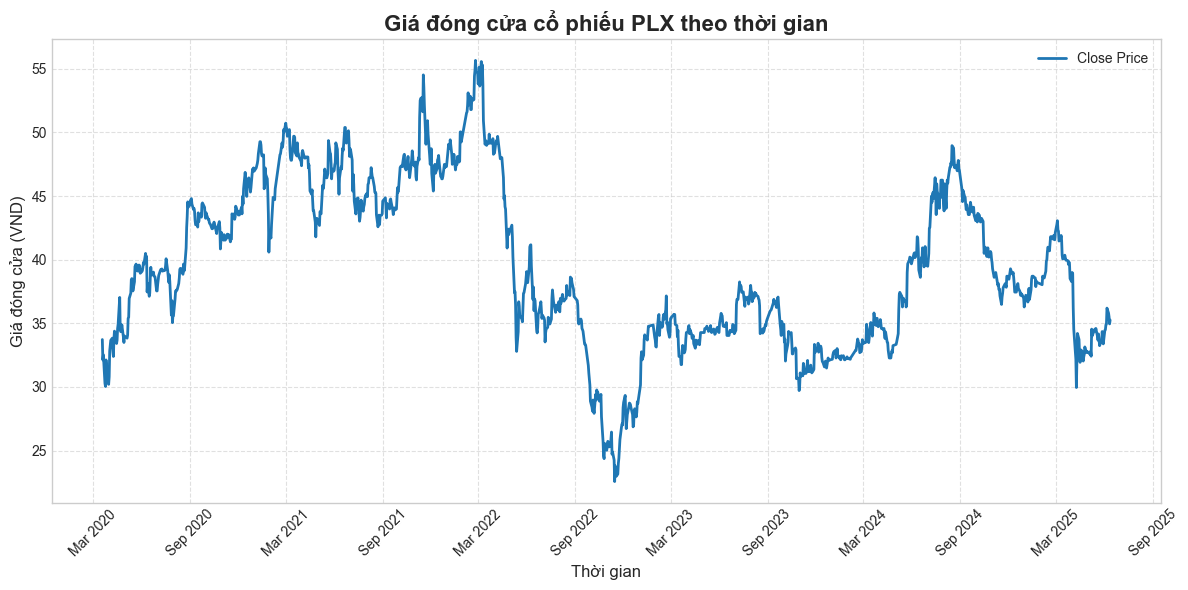

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Đảm bảo cột Date đã chuyển sang datetime
price_stock['Date'] = pd.to_datetime(price_stock['Date'])

# Tạo biểu đồ
plt.style.use('seaborn-v0_8-whitegrid')  # Giao diện đẹp nhẹ nhàng

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(price_stock['Date'], price_stock['close'], 
        linewidth=2, color='#1f77b4', label='Close Price')

# Định dạng trục X
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Hiển thị 2 tháng 1 lần
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Định dạng: Tháng Năm
plt.xticks(rotation=45)

# Tiêu đề và nhãn
plt.title('Giá đóng cửa cổ phiếu PLX theo thời gian', fontsize=16, weight='bold')
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá đóng cửa (VND)', fontsize=12)

# Grid và legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
price_stock

,Date,open,high,low,close,volume
0,2020-03-18,32.76,33.72,32.04,33.72,880510
1,2020-03-19,33.40,33.48,32.12,32.12,510280
2,2020-03-20,32.84,33.24,32.12,32.52,381290
3,2020-03-23,31.32,31.72,30.28,30.28,585750
4,2020-03-24,30.28,30.36,28.35,30.03,1147220
...,...,...,...,...,...,...
1303,2025-06-06,35.08,36.58,35.08,36.19,3678248
1304,2025-06-09,36.24,36.24,35.37,35.80,2001535
1305,2025-06-10,35.80,35.80,35.30,35.50,653163
1306,2025-06-11,35.50,35.50,34.95,34.95,899419


In [27]:
price_stock['Date'] = pd.to_datetime(price_stock['Date'])
price_stock.set_index('Date', inplace=True)

In [28]:
# Tạo một chuỗi ngày đầy đủ từ ngày đầu đến ngày cuối
full_range = pd.date_range(start=price_stock.index.min(), end=price_stock.index.max(), freq='D')
# Reindex lại DataFrame với chuỗi ngày đầy đủ
price_stock = price_stock.reindex(full_range)


In [29]:
price_stock.fillna(method='ffill', inplace=True)  # forward fill
# Nếu muốn đưa lại cột Date như cũ:
price_stock = price_stock.reset_index().rename(columns={'index': 'Date'})

In [30]:
petro_data['sentiment_direct_PLX'] =petro_data["Tiêu cực"] * -1 + petro_data["Tích cực"] * 1 + petro_data["Trung tính"] * 0
petro_data[["Date","sentiment_direct_PLX"]].tail(10)  

,Date,sentiment_direct_PLX
802,12-11-2008,0.811860
803,29-10-2008,0.550402
804,17-07-2008,0.639312
805,11-07-2008,0.030378
806,10-07-2008,0.939463
807,05-07-2008,-0.686101
808,20-06-2008,0.796869
809,13-05-2008,0.671253
812,01-02-2008,0.426718
813,23-01-2008,0.578846


In [31]:

# Ghép hai bảng dựa trên cột "date"
merged_df = price_stock.merge(df, on="Date", how="left")

# Nếu có ngày không có dữ liệu sentiment, ta có thể điền giá trị trung bình hoặc 0.5 (trung lập)
merged_df["Trung tính"] = merged_df["Trung tính"].fillna(1)

In [32]:
merged_df = merged_df[['Date', 'close','volume', 'Tiêu cực', 'Tích cực', 'Trung tính']] 
merged_df.head()

,Date,close,volume,Tiêu cực,Tích cực,Trung tính
0,2020-03-18,33.72,880510.0,0.008661,0.883013,0.108326
1,2020-03-18,33.72,880510.0,0.005235,0.911447,0.083318
2,2020-03-18,33.72,880510.0,0.918470,0.015439,0.066091
3,2020-03-19,32.12,510280.0,0.028089,0.357280,0.614631
4,2020-03-19,32.12,510280.0,0.888167,0.020776,0.091058


In [33]:
merged_df.fillna(0, inplace=True)

In [34]:
merged__new_df = merged_df.groupby('Date').mean()

In [35]:
merged__new_df.reset_index(inplace=True)

In [36]:
merged__new_df.to_csv('test_model.csv', index=False)

In [37]:
df1 = pd.read_csv('test_model.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1913 non-null   datetime64[ns]
 1   close       1913 non-null   float64       
 2   volume      1913 non-null   float64       
 3   Tiêu cực    1913 non-null   float64       
 4   Tích cực    1913 non-null   float64       
 5   Trung tính  1913 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 89.8 KB


In [38]:
# Tạo cột sentiment_score
df1["sentiment_sector"] = df1["Tiêu cực"] * -1 + df1["Tích cực"] * 1 + df1["Trung tính"] * 0
# Chọn các cột cần thiết
df1 = df1[["Date", "close","volume","sentiment_sector"]]  

In [39]:
df1.tail(5)

,Date,close,volume,sentiment_sector
1908,2025-06-08,36.19,3678248.0,0.0
1909,2025-06-09,35.80,2001535.0,0.0
1910,2025-06-10,35.50,653163.0,0.0
1911,2025-06-11,34.95,899419.0,0.0
1912,2025-06-12,35.25,600800.0,0.0


In [40]:
petro_data['Date'] = pd.to_datetime(petro_data['Date'], format='%d-%m-%Y')


In [41]:
df1 = df1.merge(petro_data[['Date','sentiment_direct_PLX']], on='Date', how='left')
df1.rename(columns={'sentiment_direct_PLX': 'sentiment_direct_PLX'}, inplace=True)
df1 = df1.groupby('Date').mean()
df1.reset_index(inplace=True)

In [48]:
df1.fillna(0, inplace=True)
df1.to_csv('test_model1.csv', index=False)

In [42]:
import pandas as pd
# Đọc dữ liệu từ file CSV
df = pd.read_csv('D:\Đồ án TN\sentiment_score.csv')

In [43]:
df.head(8)

,Date,close,volume,sentiment_sector,sentiment_direct_PLX
0,2020-03-18,34.85,880510.0,0.292511,0.0
1,2020-03-19,33.19,510280.0,-0.239021,0.0
2,2020-03-20,33.61,381290.0,0.127502,0.0
3,2020-03-21,33.61,381290.0,-0.219907,0.0
4,2020-03-22,33.61,381290.0,-0.452034,0.0
5,2020-03-23,31.29,585750.0,-0.490655,0.0
6,2020-03-24,31.04,1147220.0,-0.148008,0.0
7,2020-03-25,33.19,469810.0,0.696982,0.0
